In [ ]:
# Aluna: Kamile de Souza Novaes

# Tipos sanguíneos no mundo

## Importando bibliotecas

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re
import numpy as np

> Transformando uma tabela em um dataset para ser utilizado:

In [79]:
# URL da página do Wikipedia que contém a tabela
url = 'https://en.wikipedia.org/wiki/Blood_type_distribution_by_country'

# Lê a tabela da página usando a função read_html do pandas
tabelas = pd.read_html(url)

# Localiza a tabela desejada
tabela_desejada = tabelas[1]

# Salva a tabela em um arquivo CSV
tabela_desejada.to_csv('bloodtypes.csv', index=False)

# Lê o arquivo CSV criado
dados_tipo_sanguineo = pd.read_csv('bloodtypes.csv')

## Prévia dos dados

In [80]:
dados_tipo_sanguineo.head()

,Country/Dependency,Population[1],O+,A+,B+,AB+,O−,A−,B−,AB−
0,Albania[2],3074579,34.1%,31.2%,14.5%,5.2%,6.0%,5.5%,2.6%,0.9%
1,Algeria[3],43576691,40.0%,30.0%,15.0%,4.25%,6.6%,2.3%,1.1%,0.75%
2,Argentina[4],45479118,48.9%,31.54%,8.0%,2.45%,4.9%,3.16%,0.8%,0.25%
3,Armenia[5],3021324,29.0%,46.3%,12.0%,5.6%,2.0%,3.7%,1.0%,0.4%
4,Australia[6],25466459,38.0%,32.0%,12.0%,4.0%,7.0%,6.0%,2.0%,1.0%


Como importei uma tabela direto da Internet, ela tem algumas coisas para serem tratadas.

In [81]:
# Remove os números de referência dos nomes dos países
dados_tipo_sanguineo['Country/Dependency'] = dados_tipo_sanguineo['Country/Dependency'].apply(lambda x: re.sub(r'\[\d+\]', '', x))

# Fazendo algumas atualizações na tabela
dados_tipo_sanguineo.columns = dados_tipo_sanguineo.columns.str.replace("−", "-")
dados_tipo_sanguineo = dados_tipo_sanguineo.rename(columns={'Country/Dependency': 'Country'})
dados_tipo_sanguineo['Country'] = dados_tipo_sanguineo['Country'].str.replace('\[.*\]', '', regex=True)

# Remove o símbolo '%' das porcentagens
colunas_tipo_sanguineo = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
dados_tipo_sanguineo[colunas_tipo_sanguineo] = dados_tipo_sanguineo[colunas_tipo_sanguineo].replace('%', '', regex=True)

# Converter as colunas de tipo sanguíneo para valores numéricos
dados_tipo_sanguineo[colunas_tipo_sanguineo] = dados_tipo_sanguineo[colunas_tipo_sanguineo].apply(pd.to_numeric)

# Salva o DataFrame atualizado em um novo arquivo CSV
dados_tipo_sanguineo.to_csv('bloodtypesatt.csv', index=False)

## Prévia dos dados atualizados

In [82]:
dados_tipo_sanguineo.head()

,Country,Population[1],O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.1,31.20,14.5,5.20,6.0,5.50,2.6,0.90
1,Algeria,43576691,40.0,30.00,15.0,4.25,6.6,2.30,1.1,0.75
2,Argentina,45479118,48.9,31.54,8.0,2.45,4.9,3.16,0.8,0.25
3,Armenia,3021324,29.0,46.30,12.0,5.60,2.0,3.70,1.0,0.40
4,Australia,25466459,38.0,32.00,12.0,4.00,7.0,6.00,2.0,1.00


## Predominância do Tipo Sanguíneo por País

Agora que já temos dados melhores para serem manipulados, vou criar uma nova coluna que vai destacar a predominância do tipo sanguíneo para cada país.

In [96]:
# Encontrar o tipo sanguíneo predominante em cada país
dados_tipo_sanguineo['Predominante'] = dados_tipo_sanguineo[colunas_tipo_sanguineo].idxmax(axis=1)

# Definir a paleta de cores
cores = {
    'O+': 'blue',
    'A+': 'orange',
    'B+': 'green',
    'AB+': 'red',
    'O-': 'purple',
    'A-': 'cyan',
    'B-': 'yellow',
    'AB-': 'gray'
}

fig = px.choropleth(
    data_frame=dados_tipo_sanguineo,
    locations='Country',
    locationmode='country names',
    color='Predominante',
    color_discrete_map=cores,
    title='Predominância do Tipo Sanguíneo por País'
)

fig.update_geos(
    visible=False,
    showcountries=True,
    countrycolor='lightgray',
    projection_type='natural earth'
)

fig.show()

> Outro tipo de gráfico para visualizar melhor os outros tipos:

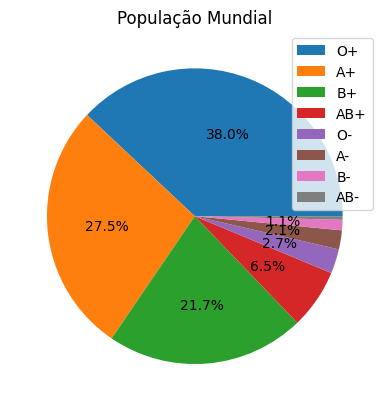

In [94]:
# Calcular a população total de cada tipo sanguíneo
populacao_tipo_sanguineo = dados_tipo_sanguineo[colunas_tipo_sanguineo].mul(dados_tipo_sanguineo['Population[1]'], axis=0).sum()

# Criar o gráfico de pizza
fig, ax = plt.subplots()

# Plotar o gráfico de pizza com as porcentagens de cada tipo sanguíneo
patches, _, autotexts = ax.pie(populacao_tipo_sanguineo, labels=None, autopct='%1.1f%%', textprops={'fontsize': 10})

# Ocultar as porcentagens menores que o limite mínimo
limite_minimo = 1
for autotext in autotexts:
    if float(autotext.get_text().strip('%')) < limite_minimo:
        autotext.set_text('')

# Criar a legenda personalizada
legenda = populacao_tipo_sanguineo.index
ax.legend(patches, legenda, loc='upper right')

ax.set_title('População Mundial')
plt.show()

## Porcentagens de Tipo Sanguíneo - Brasil

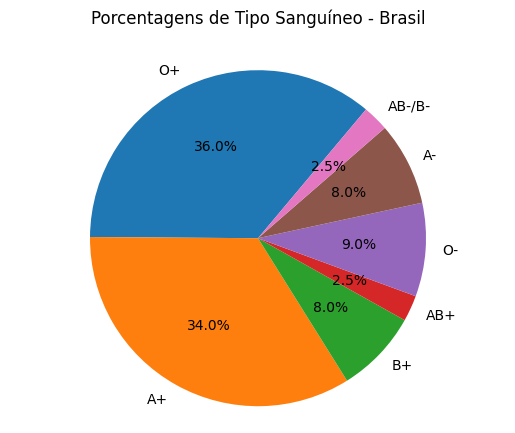

In [84]:
# Filtrar os dados apenas para o Brasil
dados_brasil = dados_tipo_sanguineo[dados_tipo_sanguineo['Country'] == 'Brazil']

# Obter as porcentagens de cada tipo sanguíneo
porcentagens = dados_brasil[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].values.tolist()[0]

# Juntar os tipos AB- e B- em "outros"
porcentagens[6] += porcentagens[7]
porcentagens.pop(7)

# Atualizar os rótulos
tipos_sanguineos = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'AB-/B-']

# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(porcentagens, labels=tipos_sanguineos, autopct='%1.1f%%', startangle=50)
ax.set_title('Porcentagens de Tipo Sanguíneo - Brasil\n')
ax.axis('equal')

# Exibir o gráfico
plt.show()

> Outro tipo de gráfico:

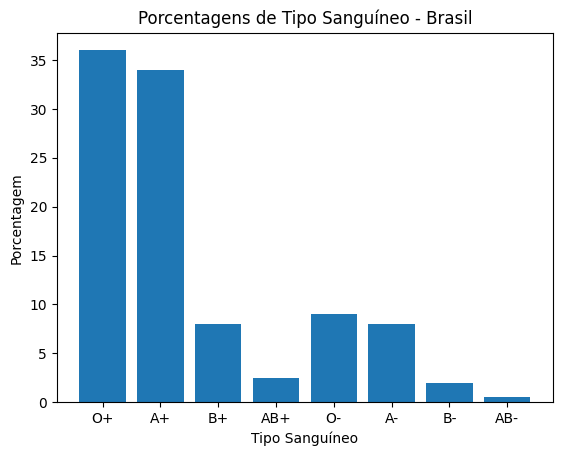

In [98]:
# Filtrar os dados apenas para o Brasil
dados_brasil = dados_tipo_sanguineo[dados_tipo_sanguineo['Country'] == 'Brazil']

# Obter as porcentagens de cada tipo sanguíneo
porcentagens = dados_brasil[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].values.tolist()[0]

# Atualizar os rótulos
tipos_sanguineos = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']

# Criar o gráfico de barras
fig, ax = plt.subplots()
x = np.arange(len(tipos_sanguineos))
ax.bar(x, porcentagens)

# Definir os rótulos dos tipos sanguíneos no eixo x
ax.set_xticks(x)
ax.set_xticklabels(tipos_sanguineos)

# Definir os rótulos e o título do gráfico
ax.set_xlabel('Tipo Sanguíneo')
ax.set_ylabel('Porcentagem')
ax.set_title('Porcentagens de Tipo Sanguíneo - Brasil')

# Exibir o gráfico
plt.show()


## Porcentagens por continente

Para realizar esses gráficos, é necessário criar mais um atributo em nosso DataFrame, os "Continentes". Para isso, vou usar umas bibliotecas prontas que já fazem essa seleção de acordo com o país.

In [ ]:
!pip install pycountry

In [ ]:
!pip install pycountry-convert

In [85]:
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code

def get_continent(country_name):
    if pd.notnull(country_name):
        try:
            country_alpha2 = country_name_to_country_alpha2(country_name)
            continent_code = country_alpha2_to_continent_code(country_alpha2)
            return continent_code
        except KeyError:
            return ''
    else:
        return ''

dados_tipo_sanguineo['Continent'] = dados_tipo_sanguineo['Country'].apply(get_continent)



> Novo atributo "Continente" criado:

In [86]:
dados_tipo_sanguineo.head()

,Country,Population[1],O+,A+,B+,AB+,O-,A-,B-,AB-,Predominante,Continent
0,Albania,3074579,34.1,31.20,14.5,5.20,6.0,5.50,2.6,0.90,O+,EU
1,Algeria,43576691,40.0,30.00,15.0,4.25,6.6,2.30,1.1,0.75,O+,AF
2,Argentina,45479118,48.9,31.54,8.0,2.45,4.9,3.16,0.8,0.25,O+,SA
3,Armenia,3021324,29.0,46.30,12.0,5.60,2.0,3.70,1.0,0.40,A+,AS
4,Australia,25466459,38.0,32.00,12.0,4.00,7.0,6.00,2.0,1.00,O+,OC


> A seguir, segue os gráficos para cada Continente. Sendo:
>

```
    'AS': 'Ásia',
    'EU': 'Europa',
    'AF': 'África',
    'SA': 'América do Sul',
    'OC': 'Oceania',
    'NA': 'América do Norte'
```



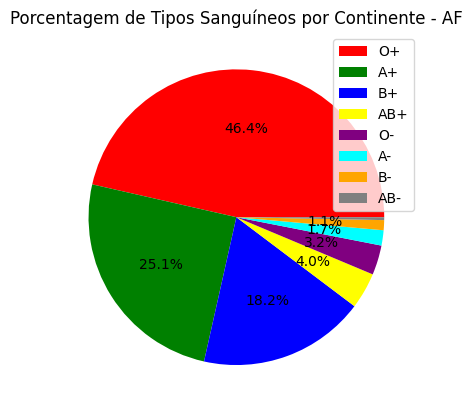

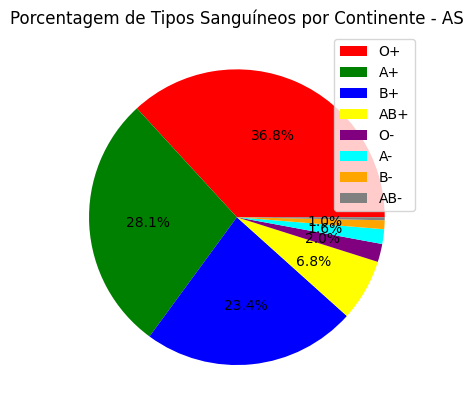

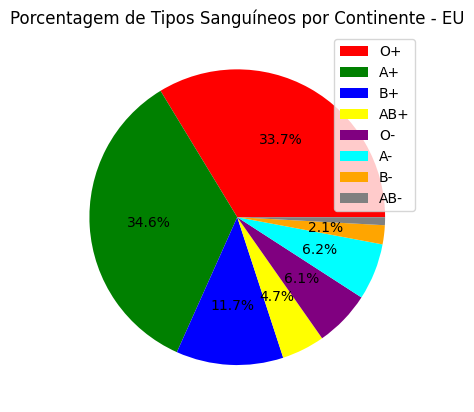

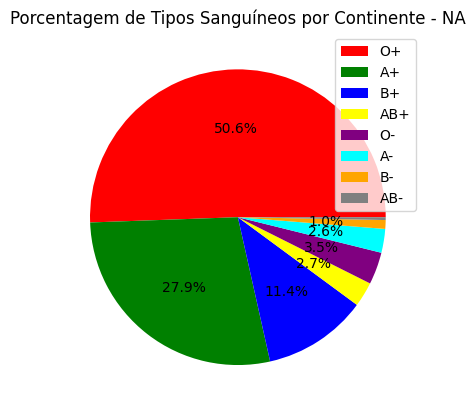

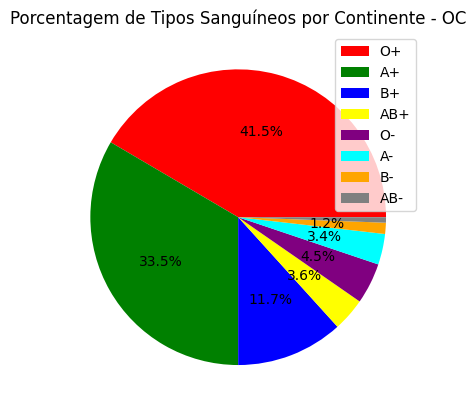

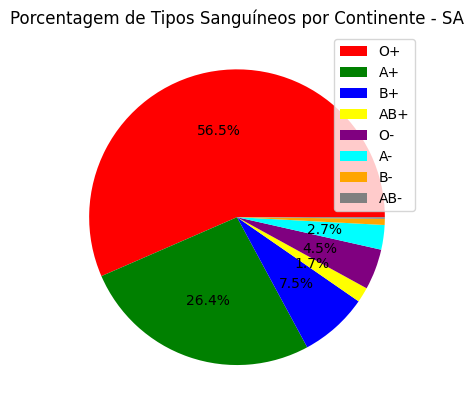

In [90]:
# Define as cores para cada tipo sanguíneo
cores_tipo_sanguineo = {
    'O+': 'red',
    'A+': 'green',
    'B+': 'blue',
    'AB+': 'yellow',
    'O-': 'purple',
    'A-': 'cyan',
    'B-': 'orange',
    'AB-': 'gray'
}

# Selecionar as colunas de porcentagens de cada tipo sanguíneo
colunas_tipo_sanguineo = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']

# Agrupar os dados por continente
dados_tipo_sanguineo_por_continente = dados_tipo_sanguineo.groupby('Continent')[colunas_tipo_sanguineo].sum()

# Definir o limite mínimo para exibição das porcentagens (por exemplo, 1%)
limite_minimo = 1

# Loop pelos continentes
for continente in dados_tipo_sanguineo_por_continente.index:
    # Verificar se há dados para o continente atual
    if continente and not dados_tipo_sanguineo_por_continente.loc[continente].isnull().all():
        # Obter as porcentagens do continente atual
        porcentagens = dados_tipo_sanguineo_por_continente.loc[continente].values

        # Filtrar as porcentagens maiores ou iguais ao limite mínimo
        porcentagens_filtradas = [pct if pct >= limite_minimo else 0 for pct in porcentagens]

        # Verificar se há porcentagens para exibir
        if sum(porcentagens_filtradas) > 0:
            # Criar o gráfico de pizza
            fig, ax = plt.subplots()
            patches, texts, autotexts = ax.pie(porcentagens_filtradas, labels=None, colors=[cores_tipo_sanguineo[tipo] for tipo in colunas_tipo_sanguineo],
                                               autopct='%1.1f%%', textprops={'fontsize': 10})

            # Ocultar as porcentagens menores que o limite mínimo
            for autotext in autotexts:
                if float(autotext.get_text().strip('%')) < limite_minimo:
                    autotext.set_text('')

            # Criar a legenda personalizada
            legenda = colunas_tipo_sanguineo
            ax.legend(patches, legenda, loc='upper right')

            ax.set_title(f'Porcentagem de Tipos Sanguíneos por Continente - {continente}')

            plt.show()


In [ ]:
# Utilizei um site de referência para comparar se os valores batiam:
# https://www.visualcapitalist.com/visualizing-the-most-widespread-blood-types-in-every-country/